In [20]:
# OpenMPの警告対応追加
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# code 15-1
import pandas as pd
df = pd.read_csv('../datafiles/Wholesale.csv')
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [3]:
# code 15-2
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
# code 15-3
df = df.drop(['Channel', 'Region'], axis = 1)

In [5]:
# code 15-4
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

In [6]:
# code 15-4
from sklearn.cluster import KMeans

In [23]:
# code 15-5
# model = KMeans(n_clusters = 3, random_state = 0)
model = KMeans(n_clusters = 3, random_state = 0, n_init='auto') # 修正18,mar,2024

In [24]:
# code 15-6

# モデルに学習させる
model.fit(sc_df)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [16]:
# code 15-7
model.labels_

array([0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0,

In [17]:
# code 15-8
sc_df['cluster'] = model.labels_
sc_df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2


In [18]:
# code 15-10
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,0.117047,-0.346099,-0.422979,0.080848,-0.418464,-0.118125
1,1.233009,4.042758,3.717242,0.850661,3.603866,2.449666
2,-0.500975,0.602638,0.876336,-0.345924,0.875403,0.083414


<Axes: xlabel='cluster'>

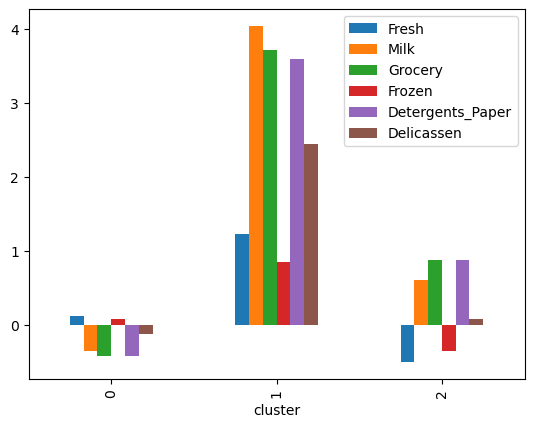

In [19]:
# code 15-11
%matplotlib inline
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind = 'bar')

In [25]:
# code 15-12
sse_list = []
# クラスタ数2～30でSSEを調べる
for n in range(2, 31):
    model = KMeans(n_clusters = n, random_state = 0, n_init='auto')
    model.fit(sc_df)
    sse = model.inertia_ # SSEの計算
    sse_list.append(sse)
sse_list

[2033.7039416736338,
 1731.3226888742481,
 1362.4992116873088,
 1066.534455296271,
 941.581966940077,
 846.8267844708524,
 794.1260729796876,
 727.32481281751,
 667.0877579013044,
 622.9955175325813,
 591.7983752177618,
 544.1906487184882,
 479.5149116884879,
 463.4618228681571,
 434.7891975147951,
 421.3869490214168,
 406.86121166793356,
 394.90586264090086,
 371.31717974733516,
 329.1750423450079,
 311.6983856705474,
 300.87182219051545,
 286.3286608669749,
 277.7630973755952,
 265.0941296097613,
 253.06783121076595,
 241.2719288324836,
 232.22651954140412,
 224.8927335197309]

<Axes: >

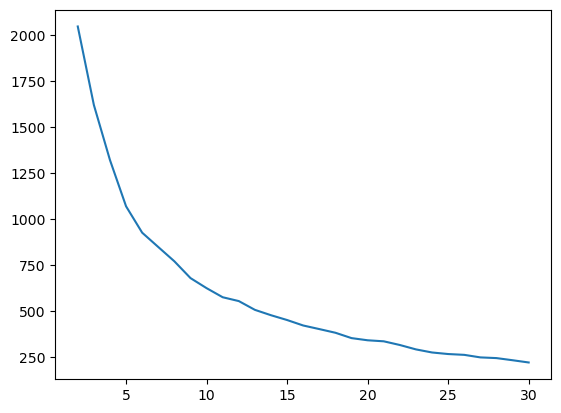

In [15]:
# code 15-13
se = pd.Series(sse_list)
num = range(2, 31) # range関数で2～30の整数列を作る
se.index = num # シリーズのインデックスを変更
se.plot(kind = 'line')

In [26]:
# code 15-14
model = KMeans(n_clusters = 5, random_state = 0, n_init='auto')
model.fit(sc_df)
sc_df['cluster'] = model.labels_
sc_df.to_csv('clustered_Wholesale.csv', index = False)

In [40]:
# code　15-1
import pandas as pd
df = pd.read_csv('../datafiles/Survived.csv')

In [41]:
# code 15-2
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [42]:
# code 15-3
df = df.fillna(df.mean(numeric_only=True))

In [43]:
# code 15-4
dummy = pd.get_dummies(df['Sex'], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop('Sex', axis = 1)

C:\Users\ai\anaconda3\envs\py39\lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-6.781461506344946 > -36.403505541710459). You may want to try with a higher value of support_fraction (current value: 0.506).
  warnings.warn(


<Axes: >

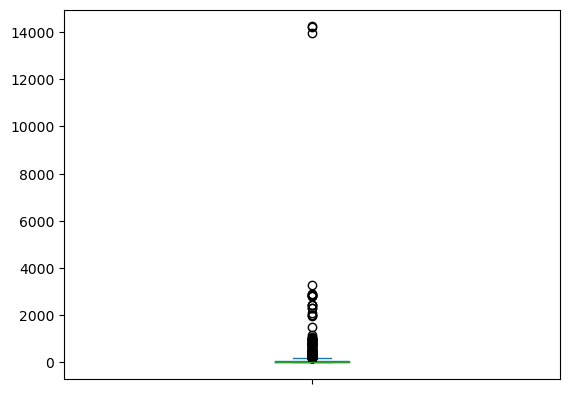

In [44]:
# code 15-5
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state=0)
mcd.fit(df)

maha_dis = mcd.mahalanobis(df)
tmp = pd.Series(maha_dis)
tmp.plot(kind = 'box')

In [45]:
# code 15-5
num = tmp[ tmp > 10000 ].index

df = df.drop(num)

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)

df2 = pd.DataFrame(sc_df, columns = df.columns)

In [47]:
# code 15-7
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
model.fit(df2)

df2['cluster'] = model.labels_

<Axes: xlabel='cluster'>

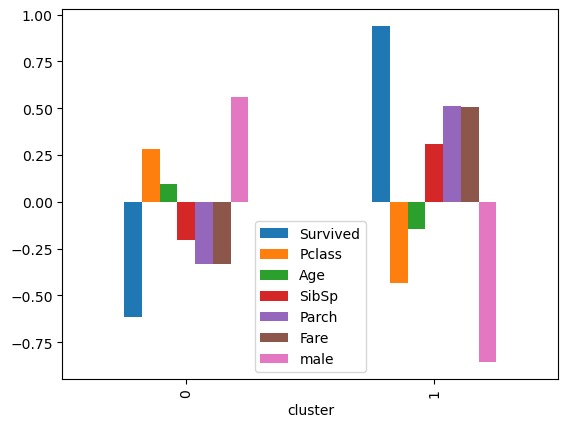

In [48]:
%matplotlib inline

c = df2.groupby('cluster').mean()
c.plot(kind = 'bar')